# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t90_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,138.476144,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
0,688.0,978.0,1071.0,1154.0,1295.0,1346.0,1490.0,1565.0,1744.0,1739.0,...,3008.0,2965.0,3027.0,2941.0,2960.0,3052.0,2922.0,3032.0,3002.0,3044.0
1,694.0,959.0,1102.0,1266.0,1355.0,1333.0,1476.0,1557.0,1677.0,1773.0,...,3010.0,3033.0,3003.0,2969.0,3021.0,3019.0,3050.0,3192.0,2992.0,3168.0
2,678.0,940.0,1056.0,1211.0,1388.0,1346.0,1488.0,1619.0,1656.0,1772.0,...,3102.0,3024.0,2998.0,3233.0,3141.0,3081.0,3041.0,3031.0,3165.0,3152.0
3,755.0,900.0,1119.0,1235.0,1300.0,1384.0,1558.0,1586.0,1809.0,1794.0,...,3022.0,3179.0,3136.0,3112.0,3041.0,3106.0,3036.0,3044.0,3016.0,3250.0
4,789.0,941.0,1123.0,1231.0,1344.0,1359.0,1504.0,1650.0,1745.0,1784.0,...,3040.0,3064.0,3141.0,3260.0,3207.0,3237.0,3078.0,3252.0,3290.0,3234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,791.0,950.0,1163.0,1338.0,1373.0,1525.0,1643.0,1705.0,1847.0,1815.0,...,2361.0,2427.0,2505.0,2444.0,2444.0,2520.0,2513.0,2477.0,2415.0,2528.0
1048,798.0,1030.0,1128.0,1226.0,1379.0,1373.0,1513.0,1748.0,1765.0,1845.0,...,2307.0,2418.0,2447.0,2522.0,2458.0,2529.0,2489.0,2454.0,2399.0,2445.0
1049,845.0,1039.0,1162.0,1311.0,1347.0,1549.0,1521.0,1733.0,1887.0,1807.0,...,2445.0,2394.0,2343.0,2589.0,2560.0,2581.0,2395.0,2489.0,2401.0,2497.0
1050,716.0,1026.0,1162.0,1315.0,1454.0,1597.0,1543.0,1792.0,1785.0,1906.0,...,2409.0,2425.0,2453.0,2400.0,2560.0,2506.0,2530.0,2436.0,2503.0,2485.0


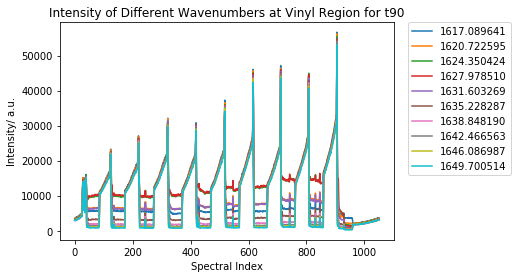

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t90')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1627.978510'] --> When using loc.
df.columns.get_loc('1627.978510') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1627.978510'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

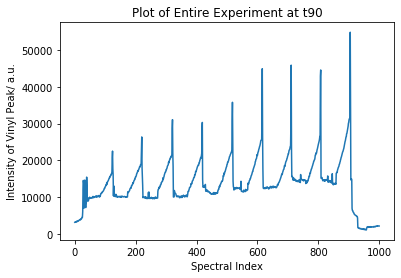

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:1000,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t90')
plt.show()

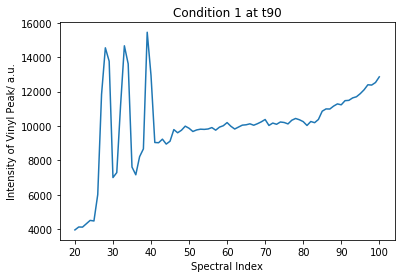

In [6]:
# Condition
df.loc[20:100,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t90')
plt.show()

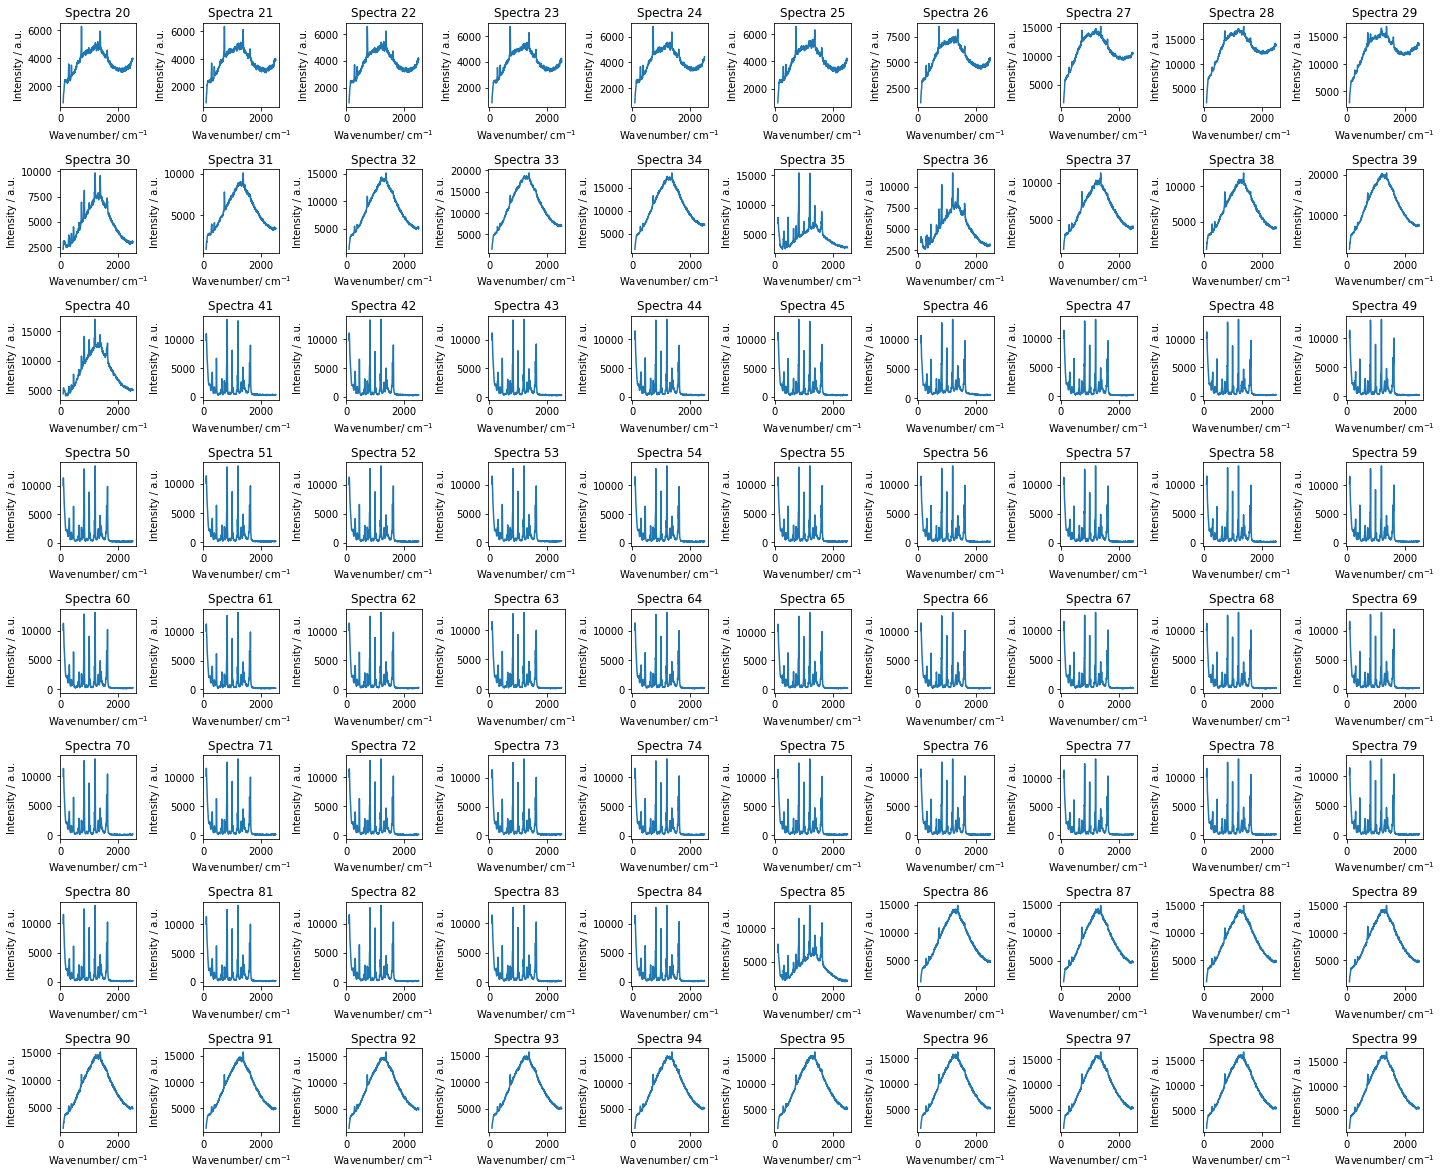

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(20, 100):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-19))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[64:78, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =19)
condition1_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
64,19,10102.0,11158.0,11344.0,10812.0,9706.0,8684.0,8023.0,7333.0,6830.0,...,89.0,159.0,160.0,177.0,218.0,158.0,192.0,178.0,121.0,216.0
65,19,10159.0,11287.0,11348.0,10781.0,9713.0,8683.0,7921.0,7460.0,6784.0,...,148.0,172.0,158.0,201.0,185.0,211.0,184.0,143.0,100.0,172.0
66,19,10117.0,11208.0,11439.0,10672.0,9720.0,8698.0,7926.0,7355.0,6786.0,...,81.0,165.0,147.0,155.0,175.0,236.0,202.0,220.0,143.0,195.0
67,19,9985.0,11216.0,11512.0,10879.0,9777.0,8944.0,8015.0,7189.0,6830.0,...,93.0,148.0,155.0,236.0,193.0,209.0,177.0,184.0,133.0,193.0
68,19,10114.0,11175.0,11290.0,10677.0,9934.0,8812.0,7944.0,7264.0,7069.0,...,104.0,169.0,169.0,223.0,148.0,242.0,156.0,179.0,141.0,214.0
69,19,10259.0,11427.0,11580.0,10741.0,9867.0,8893.0,7865.0,7462.0,6784.0,...,97.0,159.0,137.0,140.0,192.0,191.0,135.0,174.0,106.0,191.0
70,19,9976.0,11112.0,11305.0,10842.0,9887.0,8798.0,7930.0,7284.0,7157.0,...,91.0,148.0,160.0,191.0,161.0,225.0,188.0,162.0,167.0,224.0
71,19,10194.0,11177.0,11553.0,10796.0,9996.0,8870.0,7899.0,7149.0,6744.0,...,111.0,169.0,130.0,174.0,115.0,215.0,153.0,189.0,140.0,131.0
72,19,10010.0,11270.0,11395.0,10920.0,9818.0,8970.0,7963.0,7307.0,6810.0,...,83.0,136.0,169.0,230.0,180.0,199.0,189.0,172.0,162.0,175.0
73,19,10049.0,11437.0,11425.0,11001.0,9958.0,8914.0,8038.0,7268.0,6998.0,...,85.0,197.0,145.0,218.0,199.0,198.0,162.0,214.0,129.0,209.0


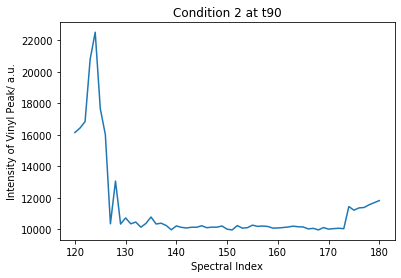

In [9]:
# Condition
df.loc[120:180,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t90')
plt.show()

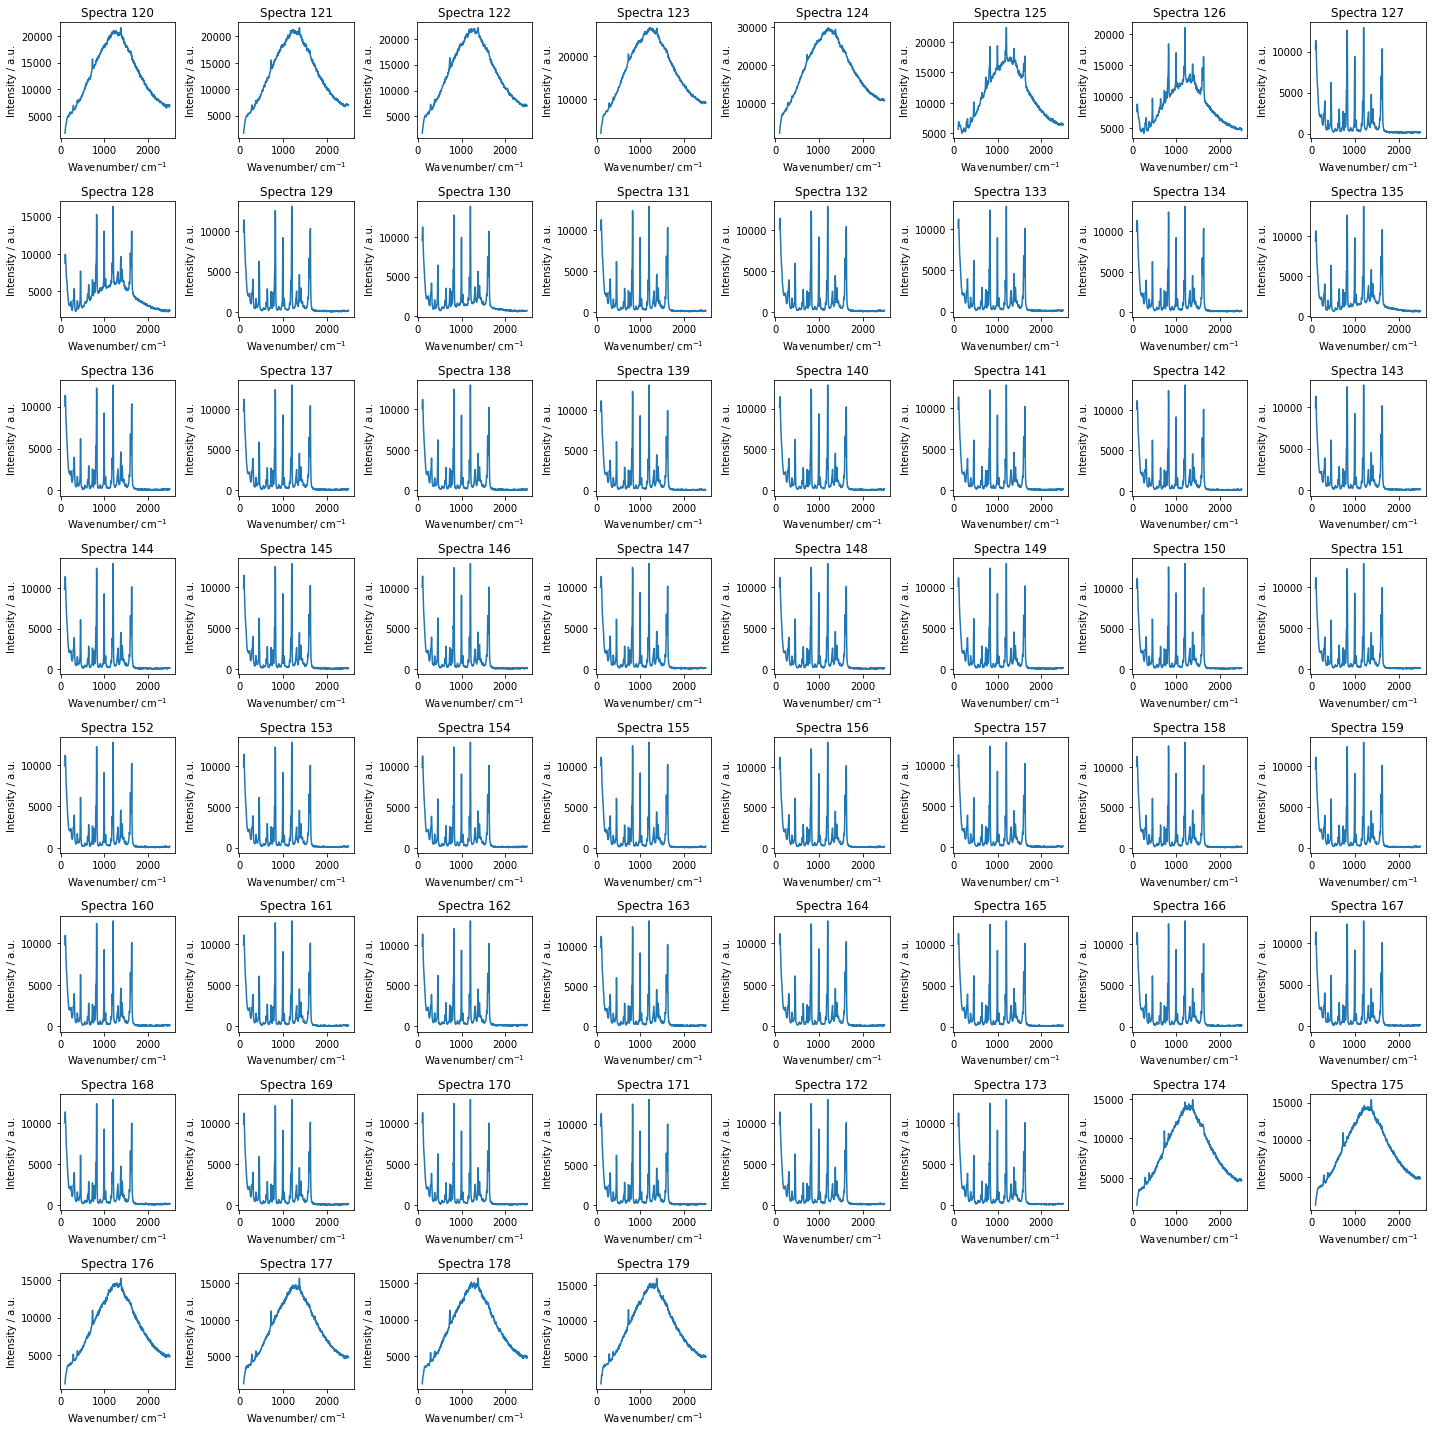

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(120, 180):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-119))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[150:164, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =20)
condition2_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
150,20,9998.0,11159.0,11144.0,10746.0,9787.0,8662.0,7997.0,7241.0,6749.0,...,101.0,191.0,125.0,180.0,150.0,114.0,151.0,110.0,139.0,156.0
151,20,9860.0,11167.0,11160.0,10480.0,9770.0,8704.0,7918.0,7216.0,6835.0,...,60.0,126.0,115.0,132.0,164.0,130.0,163.0,76.0,114.0,120.0
152,20,9909.0,11143.0,11198.0,10794.0,9688.0,8705.0,7815.0,7262.0,6873.0,...,26.0,51.0,123.0,122.0,140.0,162.0,150.0,155.0,130.0,149.0
153,20,9892.0,11044.0,11408.0,10551.0,9720.0,8764.0,8004.0,7420.0,6784.0,...,45.0,95.0,134.0,154.0,135.0,192.0,123.0,123.0,97.0,161.0
154,20,9864.0,11128.0,11262.0,10960.0,9721.0,8704.0,8056.0,7325.0,6778.0,...,50.0,128.0,135.0,175.0,120.0,175.0,158.0,156.0,119.0,170.0
155,20,10137.0,11161.0,11089.0,10641.0,9595.0,8622.0,7617.0,7338.0,6791.0,...,128.0,139.0,112.0,113.0,168.0,114.0,153.0,140.0,106.0,178.0
156,20,9829.0,11074.0,11205.0,10649.0,9755.0,8715.0,7823.0,7385.0,6699.0,...,115.0,93.0,127.0,113.0,173.0,189.0,139.0,122.0,153.0,132.0
157,20,9814.0,11248.0,11271.0,10715.0,9839.0,8947.0,7864.0,7196.0,6849.0,...,38.0,73.0,118.0,114.0,95.0,164.0,139.0,125.0,103.0,141.0
158,20,10046.0,11014.0,11288.0,10614.0,9799.0,8956.0,7905.0,7445.0,6663.0,...,127.0,97.0,157.0,166.0,140.0,187.0,137.0,146.0,118.0,163.0
159,20,9643.0,10973.0,11064.0,10488.0,9564.0,8756.0,7894.0,7196.0,6778.0,...,48.0,100.0,133.0,136.0,148.0,157.0,128.0,130.0,88.0,155.0


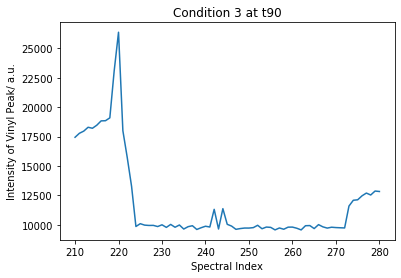

In [12]:
# Condition
df.loc[210:280,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t90')
plt.show()

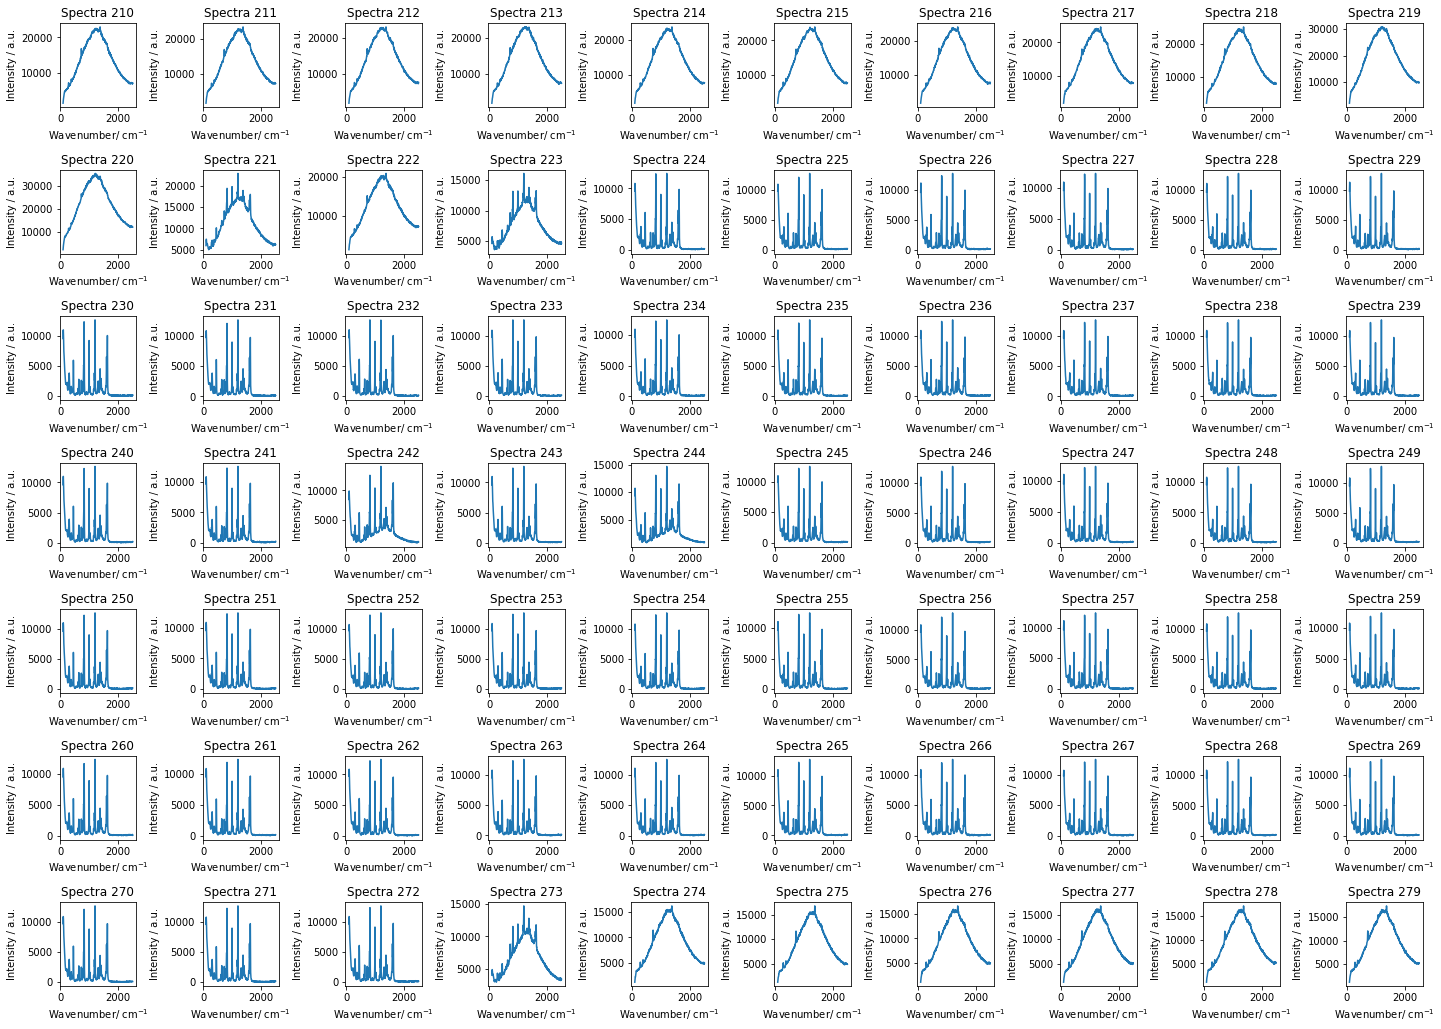

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(210, 280):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-209))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[250:264, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =21)
condition3_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
250,21,9613.0,10942.0,11014.0,10590.0,9423.0,8502.0,7612.0,6923.0,6602.0,...,62.0,108.0,80.0,162.0,162.0,203.0,130.0,135.0,145.0,207.0
251,21,9574.0,10880.0,10847.0,10367.0,9467.0,8416.0,7564.0,7028.0,6439.0,...,59.0,112.0,100.0,115.0,86.0,143.0,143.0,138.0,74.0,178.0
252,21,9666.0,10650.0,10625.0,10237.0,9380.0,8553.0,7459.0,7019.0,6712.0,...,73.0,136.0,122.0,153.0,123.0,190.0,148.0,97.0,89.0,157.0
253,21,9655.0,10830.0,10821.0,10224.0,9515.0,8406.0,7690.0,6967.0,6515.0,...,35.0,110.0,67.0,80.0,64.0,170.0,89.0,130.0,94.0,154.0
254,21,9801.0,10737.0,10812.0,10442.0,9429.0,8363.0,7549.0,6985.0,6498.0,...,39.0,99.0,84.0,144.0,133.0,120.0,138.0,93.0,67.0,165.0
255,21,9712.0,10824.0,11045.0,10251.0,9526.0,8377.0,7689.0,7124.0,6534.0,...,61.0,125.0,83.0,159.0,153.0,145.0,96.0,100.0,93.0,147.0
256,21,9634.0,10817.0,10863.0,10305.0,9484.0,8330.0,7687.0,6988.0,6527.0,...,58.0,124.0,97.0,143.0,165.0,163.0,129.0,165.0,112.0,150.0
257,21,9701.0,10567.0,11131.0,10344.0,9423.0,8391.0,7595.0,6948.0,6619.0,...,59.0,100.0,79.0,117.0,51.0,134.0,98.0,85.0,51.0,132.0
258,21,9672.0,10698.0,10847.0,10373.0,9346.0,8480.0,7648.0,7079.0,6601.0,...,13.0,90.0,65.0,120.0,81.0,123.0,89.0,99.0,66.0,131.0
259,21,9668.0,10828.0,10755.0,10496.0,9327.0,8504.0,7564.0,7060.0,6472.0,...,34.0,112.0,115.0,162.0,100.0,142.0,128.0,87.0,21.0,113.0


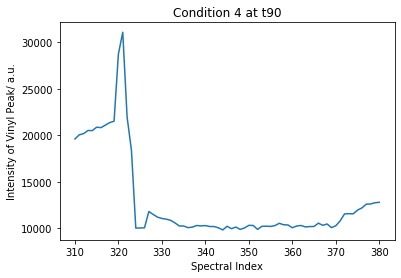

In [15]:
# Condition
df.loc[310:380,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t90')
plt.show()

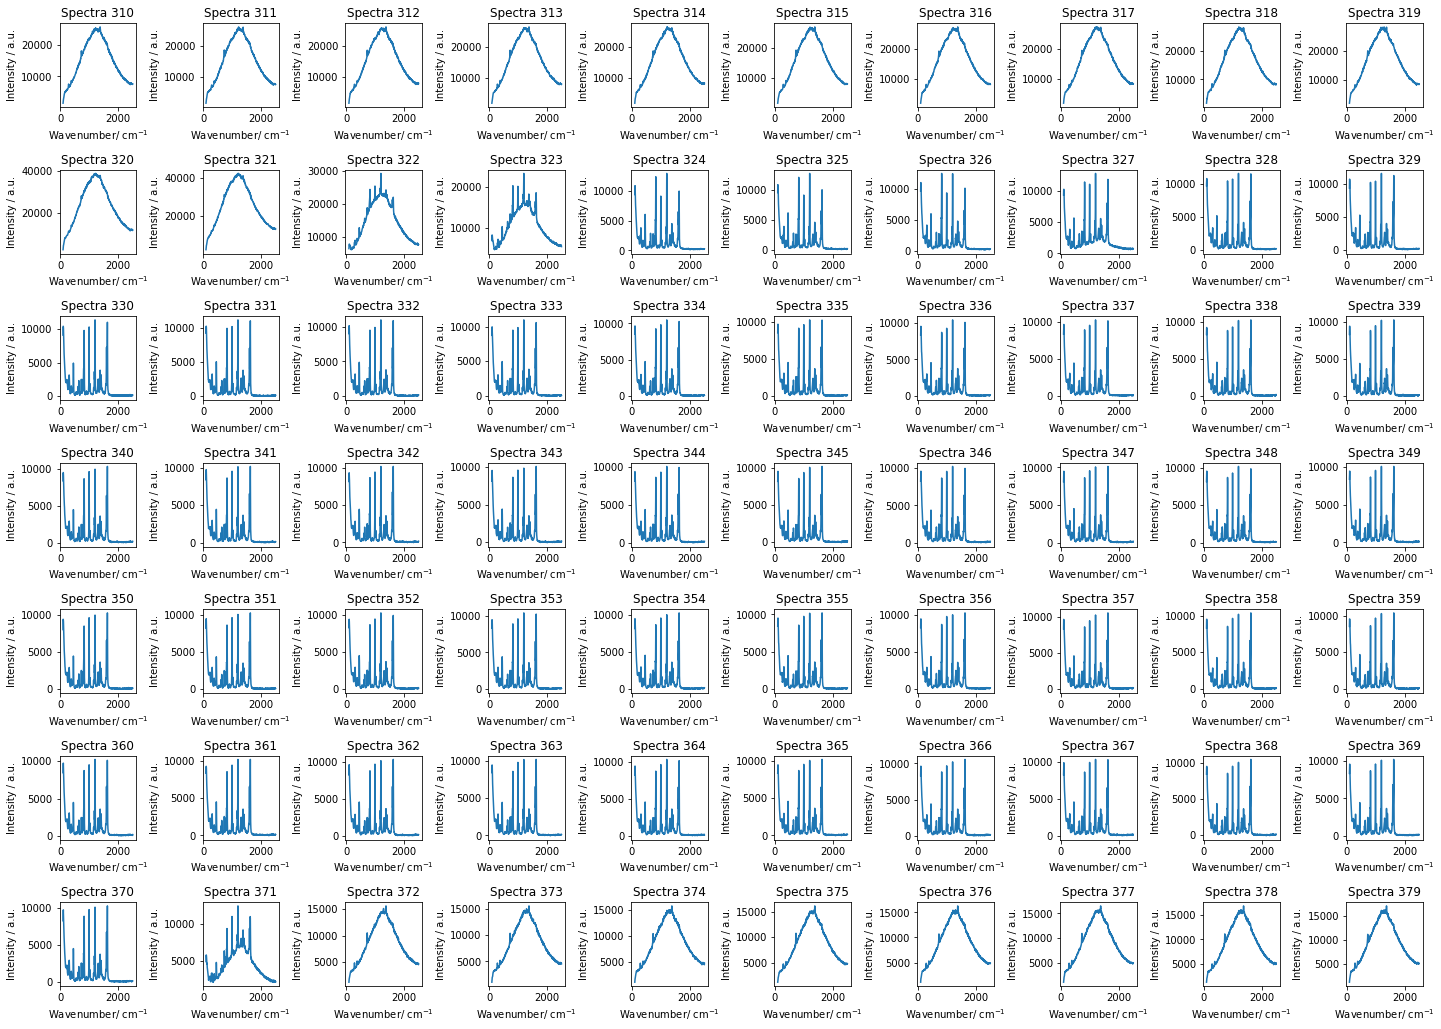

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(310, 380):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-309))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[350:364, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =22)
condition4_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
350,22,8061.0,9460.0,9374.0,9131.0,8413.0,7564.0,6711.0,6107.0,5745.0,...,44.0,69.0,96.0,85.0,98.0,177.0,90.0,125.0,88.0,116.0
351,22,8248.0,9309.0,9523.0,9045.0,8182.0,7414.0,6704.0,6287.0,5830.0,...,47.0,102.0,85.0,104.0,83.0,152.0,109.0,116.0,66.0,74.0
352,22,8253.0,9199.0,9375.0,9059.0,8344.0,7387.0,6713.0,6338.0,5829.0,...,69.0,140.0,28.0,114.0,94.0,188.0,107.0,130.0,52.0,100.0
353,22,8323.0,9406.0,9456.0,9169.0,8269.0,7406.0,6860.0,6355.0,5810.0,...,54.0,70.0,133.0,128.0,157.0,178.0,88.0,84.0,123.0,91.0
354,22,8140.0,9455.0,9460.0,9085.0,8364.0,7410.0,6828.0,6304.0,5953.0,...,81.0,160.0,125.0,119.0,87.0,157.0,120.0,85.0,109.0,180.0
355,22,8464.0,9380.0,9518.0,9148.0,8376.0,7417.0,6825.0,6202.0,6081.0,...,68.0,94.0,68.0,102.0,67.0,139.0,118.0,49.0,74.0,138.0
356,22,8307.0,9336.0,9487.0,9051.0,8504.0,7646.0,6850.0,6194.0,5946.0,...,37.0,129.0,96.0,114.0,119.0,154.0,113.0,98.0,87.0,119.0
357,22,8320.0,9645.0,9569.0,8997.0,8457.0,7509.0,6801.0,6233.0,5973.0,...,12.0,110.0,91.0,113.0,118.0,180.0,120.0,58.0,91.0,109.0
358,22,8323.0,9478.0,9524.0,8975.0,8531.0,7482.0,6858.0,6372.0,5886.0,...,79.0,70.0,151.0,94.0,108.0,124.0,85.0,132.0,55.0,142.0
359,22,8535.0,9545.0,9515.0,9157.0,8322.0,7599.0,6803.0,6251.0,6023.0,...,54.0,124.0,107.0,138.0,85.0,143.0,106.0,116.0,85.0,143.0


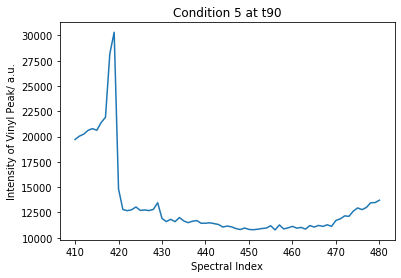

In [18]:
# Condition
df.loc[410:480,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t90')
plt.show()

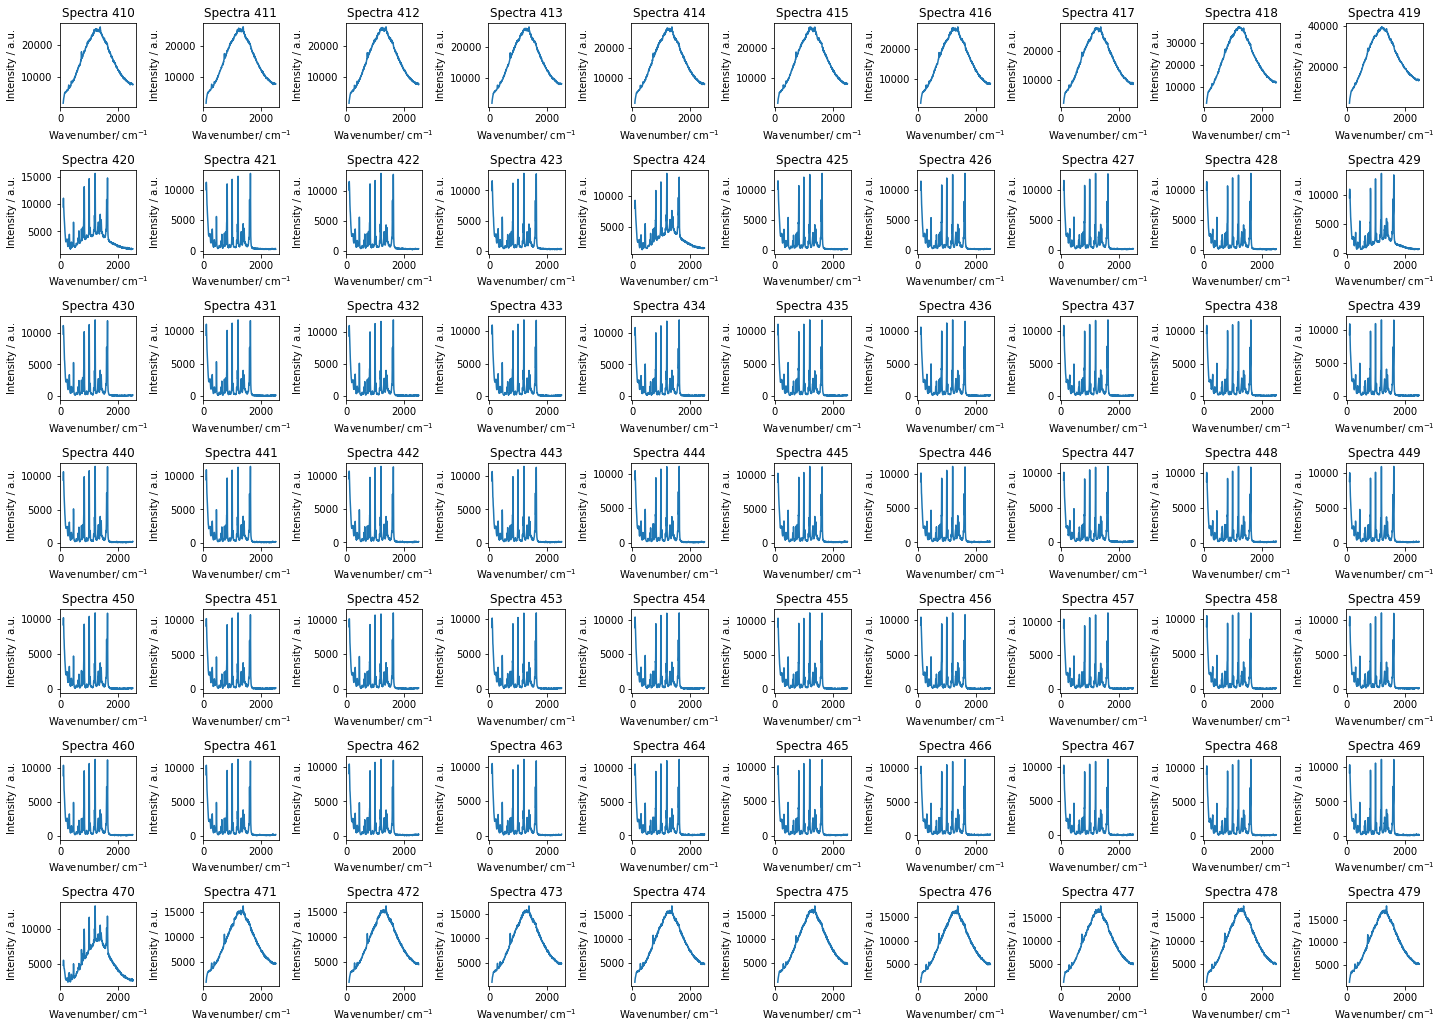

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(410, 480):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-409))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[450:464, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =23)
condition5_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
450,23,9163.0,9785.0,10166.0,9647.0,8988.0,7879.0,7260.0,6965.0,6163.0,...,43.0,111.0,120.0,148.0,126.0,132.0,99.0,115.0,84.0,128.0
451,23,9170.0,9942.0,10233.0,9753.0,8903.0,7867.0,7428.0,6698.0,6366.0,...,52.0,82.0,94.0,144.0,98.0,147.0,99.0,124.0,98.0,174.0
452,23,8961.0,10091.0,10104.0,10076.0,9044.0,8110.0,7180.0,6730.0,6346.0,...,30.0,68.0,109.0,104.0,152.0,115.0,116.0,131.0,102.0,138.0
453,23,8833.0,10043.0,10178.0,9689.0,8966.0,7892.0,7376.0,6522.0,6273.0,...,107.0,147.0,81.0,120.0,87.0,102.0,151.0,113.0,83.0,142.0
454,23,8845.0,10303.0,10366.0,9648.0,8896.0,8096.0,7360.0,6790.0,6304.0,...,27.0,93.0,92.0,101.0,130.0,119.0,134.0,106.0,90.0,171.0
455,23,9196.0,10098.0,10443.0,9832.0,8932.0,8120.0,7254.0,6866.0,6379.0,...,81.0,113.0,86.0,103.0,109.0,153.0,167.0,130.0,84.0,129.0
456,23,9238.0,10176.0,10414.0,9750.0,8857.0,7878.0,7408.0,6866.0,6475.0,...,85.0,128.0,69.0,138.0,110.0,180.0,121.0,66.0,106.0,102.0
457,23,9086.0,10342.0,10256.0,9823.0,9029.0,8109.0,7312.0,6970.0,6531.0,...,24.0,115.0,87.0,134.0,79.0,145.0,144.0,119.0,45.0,160.0
458,23,8975.0,10257.0,10518.0,9972.0,8897.0,8038.0,7347.0,6781.0,6435.0,...,81.0,106.0,95.0,127.0,151.0,159.0,97.0,108.0,134.0,168.0
459,23,9237.0,10150.0,10533.0,9997.0,9119.0,8092.0,7396.0,6738.0,6424.0,...,26.0,103.0,99.0,97.0,130.0,160.0,109.0,83.0,46.0,136.0


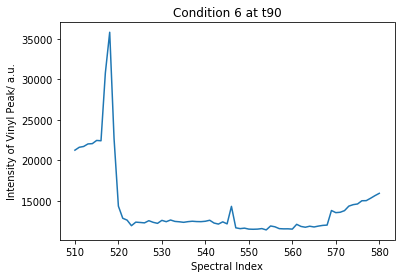

In [21]:
# Condition
df.loc[510:580,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t90')
plt.show()

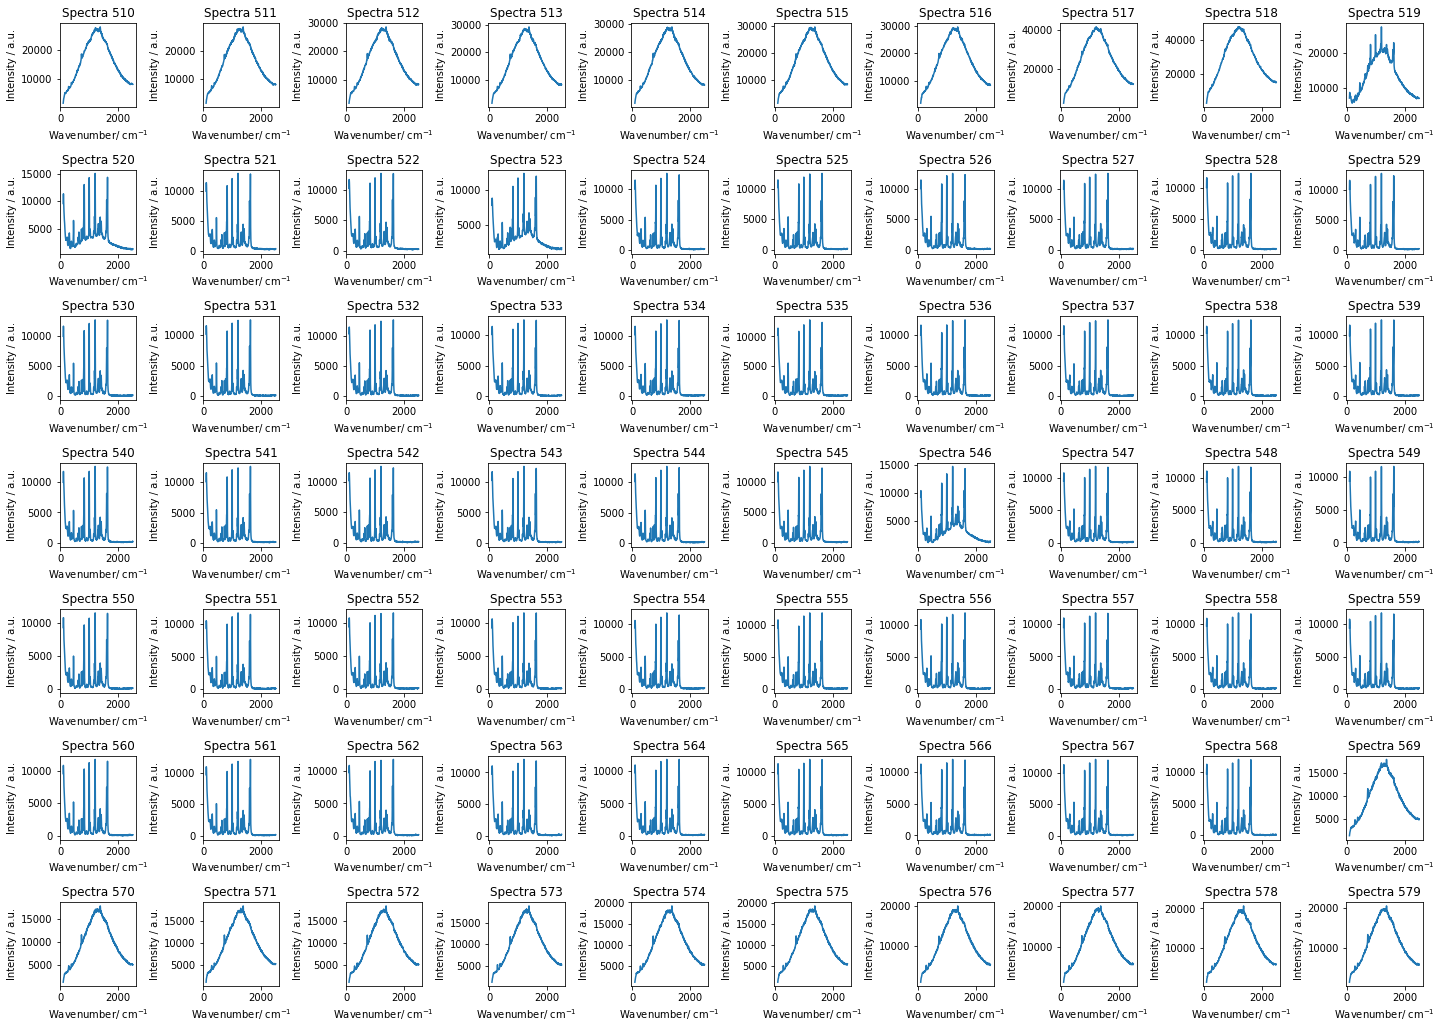

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(510, 580):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-509))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[550:564, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =24)
condition6_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
550,24,9355.0,10403.0,10859.0,10218.0,9468.0,8196.0,7520.0,7066.0,6561.0,...,111.0,117.0,127.0,164.0,140.0,141.0,143.0,106.0,84.0,148.0
551,24,9381.0,10521.0,10465.0,10384.0,9364.0,8435.0,7460.0,7163.0,6650.0,...,65.0,89.0,63.0,152.0,58.0,144.0,97.0,159.0,42.0,86.0
552,24,9408.0,10440.0,10750.0,10312.0,9105.0,8370.0,7767.0,7055.0,6495.0,...,46.0,101.0,114.0,115.0,164.0,105.0,131.0,90.0,104.0,144.0
553,24,9312.0,10626.0,10682.0,10268.0,9387.0,8574.0,7576.0,7177.0,6601.0,...,33.0,123.0,100.0,139.0,144.0,149.0,66.0,107.0,82.0,98.0
554,24,9453.0,10569.0,10509.0,10340.0,9345.0,8246.0,7668.0,6968.0,6710.0,...,79.0,85.0,163.0,117.0,161.0,189.0,92.0,115.0,102.0,150.0
555,24,9579.0,10776.0,10811.0,10343.0,9497.0,8472.0,7868.0,7218.0,6541.0,...,51.0,120.0,118.0,172.0,106.0,175.0,104.0,83.0,58.0,168.0
556,24,9325.0,10754.0,10692.0,10689.0,9252.0,8576.0,7527.0,7155.0,6610.0,...,22.0,82.0,98.0,123.0,134.0,132.0,94.0,121.0,85.0,150.0
557,24,9479.0,10928.0,10745.0,10402.0,9301.0,8502.0,7729.0,7047.0,6558.0,...,40.0,98.0,161.0,72.0,92.0,166.0,136.0,63.0,77.0,94.0
558,24,9709.0,10542.0,10859.0,10371.0,9417.0,8472.0,7794.0,7079.0,6485.0,...,32.0,125.0,111.0,156.0,112.0,159.0,98.0,107.0,135.0,157.0
559,24,9402.0,10757.0,10568.0,10306.0,9338.0,8366.0,7648.0,7093.0,6739.0,...,5.0,67.0,48.0,124.0,80.0,166.0,73.0,134.0,75.0,141.0


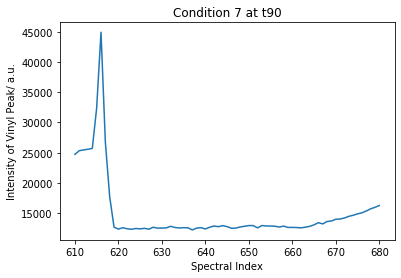

In [24]:
# Condition
df.loc[610:680,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t90')
plt.show()

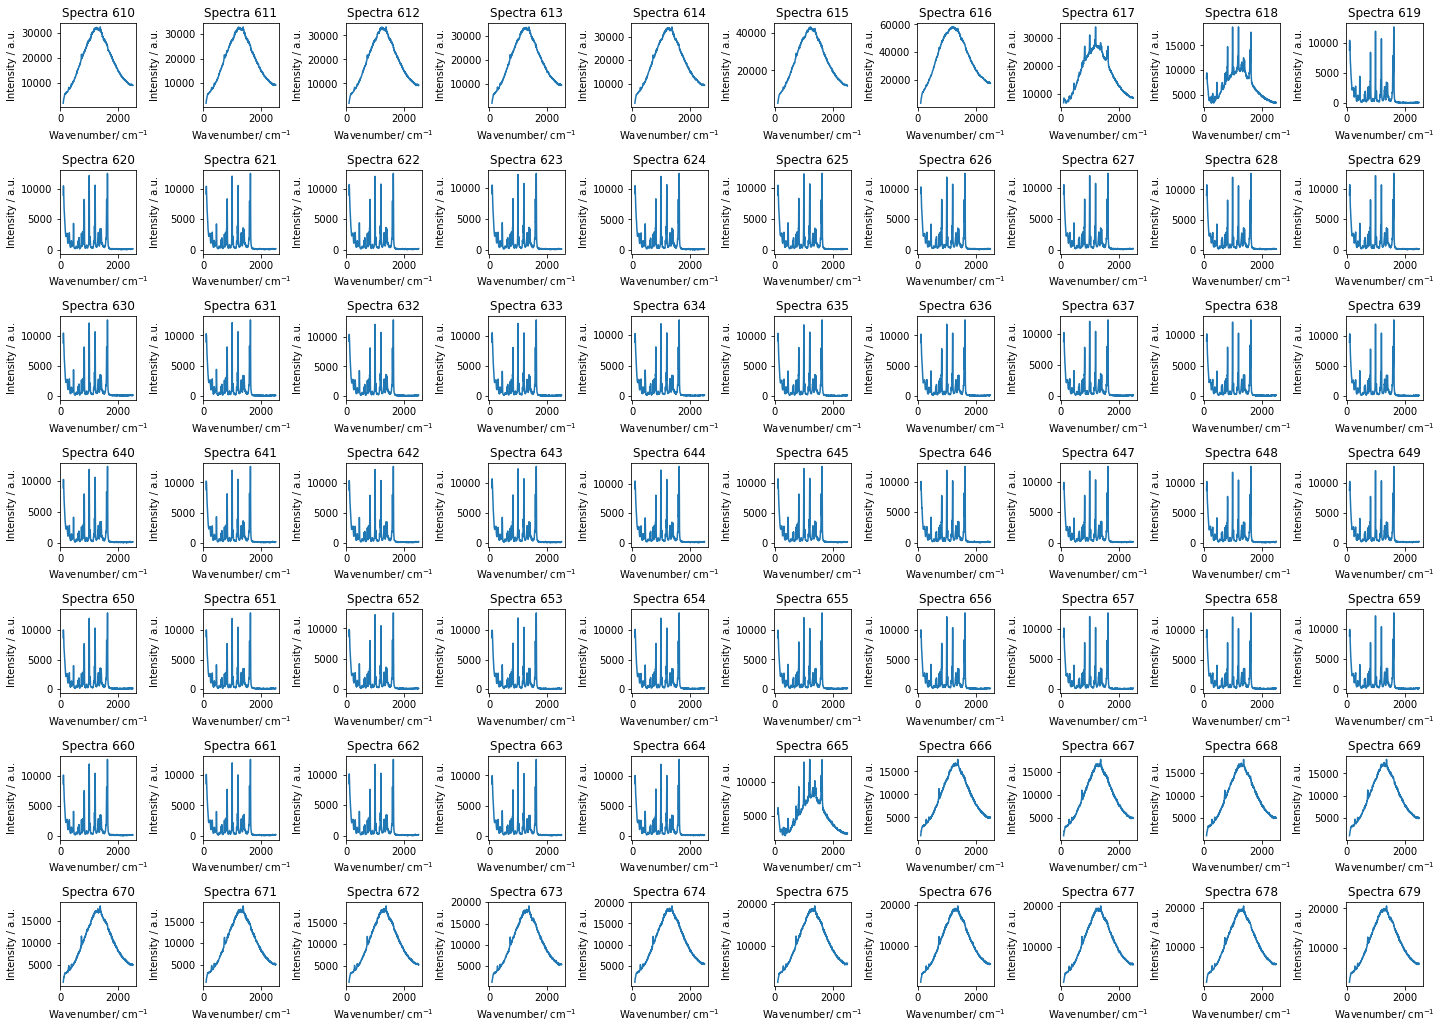

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(610, 680):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-609))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[645:659, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =25)
condition7_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
645,25,9195.0,10299.0,10683.0,9958.0,9254.0,8376.0,7620.0,7094.0,6902.0,...,43.0,156.0,138.0,119.0,119.0,164.0,131.0,104.0,106.0,172.0
646,25,8709.0,9792.0,10026.0,9475.0,8984.0,8061.0,7289.0,6638.0,6397.0,...,31.0,152.0,78.0,159.0,121.0,140.0,123.0,112.0,108.0,153.0
647,25,8807.0,9796.0,9891.0,9437.0,8671.0,8063.0,7275.0,6749.0,6385.0,...,37.0,103.0,150.0,105.0,127.0,149.0,141.0,152.0,132.0,142.0
648,25,8702.0,9664.0,10196.0,9427.0,8842.0,7907.0,7311.0,6570.0,6331.0,...,33.0,96.0,110.0,169.0,146.0,193.0,124.0,114.0,114.0,206.0
649,25,8816.0,9780.0,10299.0,9644.0,8728.0,8000.0,7313.0,6676.0,6251.0,...,63.0,119.0,108.0,134.0,112.0,204.0,156.0,127.0,133.0,149.0
650,25,8724.0,9973.0,10047.0,9558.0,9028.0,7826.0,7156.0,6770.0,6244.0,...,98.0,158.0,68.0,156.0,133.0,166.0,103.0,129.0,98.0,173.0
651,25,8919.0,9954.0,10050.0,9761.0,8930.0,8112.0,7277.0,6821.0,6250.0,...,66.0,113.0,85.0,113.0,108.0,150.0,101.0,60.0,65.0,171.0
652,25,8688.0,9837.0,9726.0,9725.0,8861.0,7950.0,7332.0,6841.0,6340.0,...,48.0,86.0,104.0,141.0,116.0,187.0,137.0,128.0,102.0,99.0
653,25,8749.0,10017.0,9924.0,9834.0,9066.0,7892.0,7453.0,6935.0,6308.0,...,46.0,124.0,117.0,114.0,150.0,153.0,93.0,125.0,92.0,157.0
654,25,8809.0,9792.0,10092.0,9807.0,9037.0,7942.0,7445.0,6757.0,6306.0,...,43.0,103.0,134.0,171.0,109.0,160.0,123.0,82.0,109.0,165.0


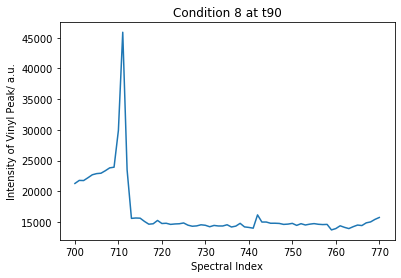

In [27]:
# Condition
df.loc[700:770,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t90')
plt.show()

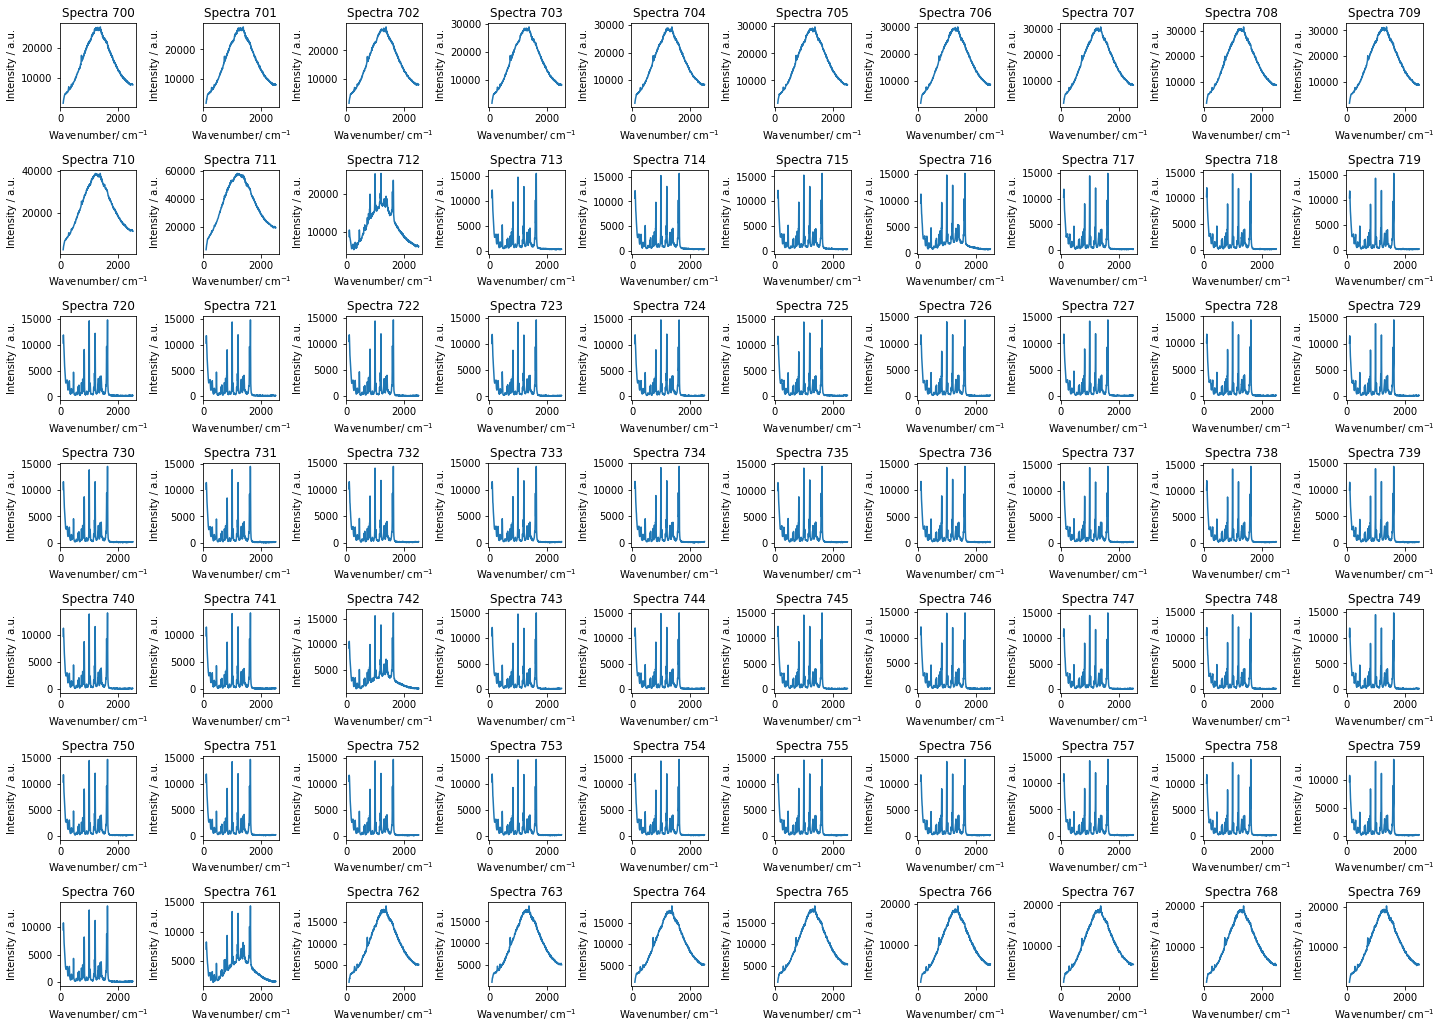

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(700, 770):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-699))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[743:757, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =26)
condition8_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
743,26,10486.0,11788.0,12121.0,11703.0,10514.0,9695.0,8722.0,8017.0,7635.0,...,91.0,100.0,104.0,123.0,148.0,117.0,112.0,150.0,140.0,143.0
744,26,10497.0,11803.0,12024.0,11517.0,10773.0,9670.0,8637.0,8039.0,7604.0,...,34.0,140.0,150.0,173.0,123.0,148.0,93.0,158.0,40.0,156.0
745,26,10447.0,11766.0,12294.0,11566.0,10545.0,9523.0,8666.0,8053.0,7538.0,...,116.0,121.0,149.0,119.0,140.0,128.0,152.0,75.0,119.0,128.0
746,26,10609.0,11754.0,12074.0,11597.0,10329.0,9558.0,8665.0,7982.0,7427.0,...,109.0,119.0,142.0,177.0,152.0,190.0,99.0,137.0,84.0,160.0
747,26,10467.0,11769.0,11853.0,11566.0,10575.0,9406.0,8573.0,7921.0,7451.0,...,76.0,116.0,147.0,125.0,192.0,154.0,127.0,112.0,125.0,114.0
748,26,10461.0,11706.0,11931.0,11423.0,10500.0,9474.0,8576.0,7793.0,7445.0,...,32.0,132.0,62.0,119.0,114.0,165.0,134.0,126.0,69.0,114.0
749,26,10229.0,11765.0,11884.0,11266.0,10516.0,9539.0,8738.0,7829.0,7351.0,...,92.0,68.0,73.0,134.0,92.0,157.0,75.0,116.0,80.0,99.0
750,26,10386.0,11601.0,11802.0,11445.0,10329.0,9505.0,8532.0,8045.0,7478.0,...,85.0,109.0,136.0,107.0,89.0,160.0,147.0,76.0,156.0,158.0
751,26,10260.0,11720.0,11875.0,11246.0,10324.0,9356.0,8632.0,7841.0,7469.0,...,59.0,90.0,115.0,163.0,74.0,163.0,131.0,113.0,93.0,148.0
752,26,10516.0,11690.0,11522.0,11441.0,10550.0,9255.0,8540.0,7974.0,7368.0,...,84.0,144.0,88.0,145.0,90.0,163.0,109.0,147.0,144.0,144.0


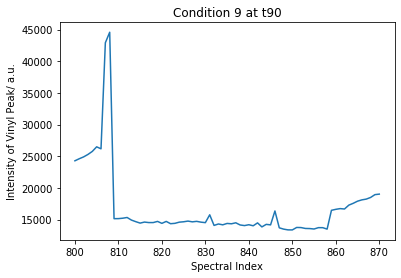

In [30]:
# Condition
df.loc[800:870,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t90')
plt.show()

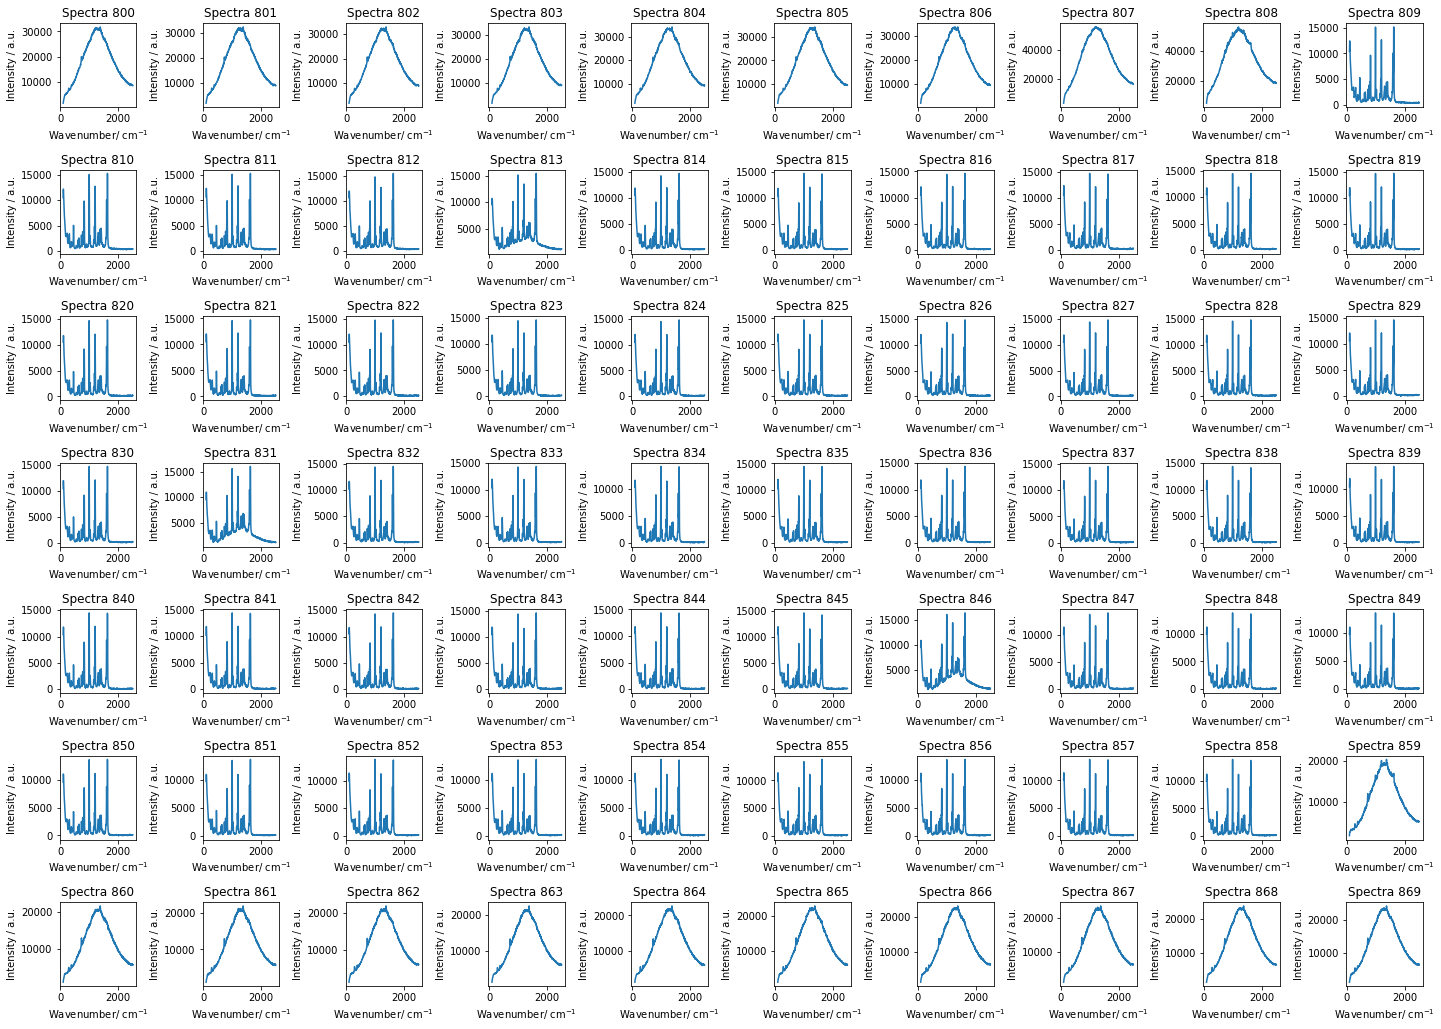

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(800, 870):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-799))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[816:830, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =27)
condition9_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
816,27,10465.0,11819.0,12053.0,11450.0,10469.0,9685.0,8716.0,7949.0,7648.0,...,108.0,222.0,166.0,207.0,200.0,244.0,206.0,168.0,114.0,182.0
817,27,10532.0,11668.0,12295.0,11653.0,10496.0,9545.0,8582.0,7867.0,7381.0,...,66.0,138.0,183.0,176.0,165.0,263.0,162.0,184.0,153.0,240.0
818,27,10546.0,11721.0,11792.0,11447.0,10500.0,9527.0,8467.0,7926.0,7392.0,...,131.0,147.0,133.0,159.0,191.0,160.0,172.0,155.0,126.0,150.0
819,27,10500.0,11799.0,11984.0,11586.0,10615.0,9529.0,8697.0,8069.0,7479.0,...,103.0,176.0,169.0,167.0,150.0,195.0,139.0,156.0,128.0,204.0
820,27,10505.0,11608.0,11784.0,11599.0,10514.0,9594.0,8629.0,7955.0,7505.0,...,111.0,153.0,176.0,200.0,174.0,234.0,190.0,121.0,101.0,204.0
821,27,10533.0,11884.0,12024.0,11528.0,10497.0,9690.0,8653.0,8097.0,7395.0,...,63.0,159.0,176.0,219.0,159.0,170.0,229.0,149.0,107.0,224.0
822,27,10474.0,11613.0,12004.0,11266.0,10546.0,9432.0,8634.0,7917.0,7653.0,...,60.0,184.0,152.0,161.0,161.0,213.0,103.0,160.0,96.0,188.0
823,27,10421.0,11665.0,11696.0,11591.0,10422.0,9458.0,8560.0,8026.0,7409.0,...,125.0,140.0,158.0,195.0,162.0,214.0,162.0,169.0,165.0,180.0
824,27,10471.0,11812.0,11948.0,11450.0,10570.0,9583.0,8763.0,8008.0,7480.0,...,117.0,164.0,116.0,155.0,163.0,213.0,200.0,155.0,135.0,228.0
825,27,10628.0,11993.0,11744.0,11469.0,10666.0,9664.0,8682.0,7840.0,7694.0,...,132.0,158.0,179.0,227.0,235.0,233.0,171.0,229.0,112.0,200.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
64,19,10102.0,11158.0,11344.0,10812.0,9706.0,8684.0,8023.0,7333.0,6830.0,...,89.0,159.0,160.0,177.0,218.0,158.0,192.0,178.0,121.0,216.0
65,19,10159.0,11287.0,11348.0,10781.0,9713.0,8683.0,7921.0,7460.0,6784.0,...,148.0,172.0,158.0,201.0,185.0,211.0,184.0,143.0,100.0,172.0
66,19,10117.0,11208.0,11439.0,10672.0,9720.0,8698.0,7926.0,7355.0,6786.0,...,81.0,165.0,147.0,155.0,175.0,236.0,202.0,220.0,143.0,195.0
67,19,9985.0,11216.0,11512.0,10879.0,9777.0,8944.0,8015.0,7189.0,6830.0,...,93.0,148.0,155.0,236.0,193.0,209.0,177.0,184.0,133.0,193.0
68,19,10114.0,11175.0,11290.0,10677.0,9934.0,8812.0,7944.0,7264.0,7069.0,...,104.0,169.0,169.0,223.0,148.0,242.0,156.0,179.0,141.0,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,27,10346.0,11647.0,11938.0,11431.0,10574.0,9603.0,8925.0,7975.0,7305.0,...,103.0,200.0,120.0,230.0,158.0,208.0,204.0,143.0,147.0,144.0
827,27,10454.0,11656.0,11852.0,11580.0,10637.0,9535.0,8703.0,8104.0,7477.0,...,106.0,190.0,99.0,153.0,190.0,179.0,165.0,152.0,122.0,213.0
828,27,10586.0,11864.0,11839.0,11497.0,10598.0,9384.0,8804.0,7899.0,7569.0,...,156.0,115.0,166.0,157.0,198.0,218.0,179.0,203.0,148.0,217.0
829,27,10651.0,12107.0,12098.0,11426.0,10600.0,9483.0,8821.0,7968.0,7520.0,...,130.0,173.0,188.0,209.0,204.0,210.0,166.0,161.0,128.0,205.0


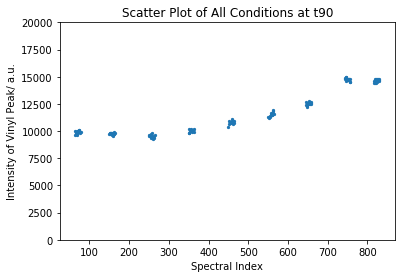

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t90')
plt.ylim(0, 20000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
64,19,10102.0,11158.0,11344.0,10812.0,9706.0,8684.0,8023.0,7333.0,6830.0,...,89.0,159.0,160.0,177.0,218.0,158.0,192.0,178.0,121.0,216.0
65,19,10159.0,11287.0,11348.0,10781.0,9713.0,8683.0,7921.0,7460.0,6784.0,...,148.0,172.0,158.0,201.0,185.0,211.0,184.0,143.0,100.0,172.0
66,19,10117.0,11208.0,11439.0,10672.0,9720.0,8698.0,7926.0,7355.0,6786.0,...,81.0,165.0,147.0,155.0,175.0,236.0,202.0,220.0,143.0,195.0
67,19,9985.0,11216.0,11512.0,10879.0,9777.0,8944.0,8015.0,7189.0,6830.0,...,93.0,148.0,155.0,236.0,193.0,209.0,177.0,184.0,133.0,193.0
68,19,10114.0,11175.0,11290.0,10677.0,9934.0,8812.0,7944.0,7264.0,7069.0,...,104.0,169.0,169.0,223.0,148.0,242.0,156.0,179.0,141.0,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,27,10346.0,11647.0,11938.0,11431.0,10574.0,9603.0,8925.0,7975.0,7305.0,...,103.0,200.0,120.0,230.0,158.0,208.0,204.0,143.0,147.0,144.0
827,27,10454.0,11656.0,11852.0,11580.0,10637.0,9535.0,8703.0,8104.0,7477.0,...,106.0,190.0,99.0,153.0,190.0,179.0,165.0,152.0,122.0,213.0
828,27,10586.0,11864.0,11839.0,11497.0,10598.0,9384.0,8804.0,7899.0,7569.0,...,156.0,115.0,166.0,157.0,198.0,218.0,179.0,203.0,148.0,217.0
829,27,10651.0,12107.0,12098.0,11426.0,10600.0,9483.0,8821.0,7968.0,7520.0,...,130.0,173.0,188.0,209.0,204.0,210.0,166.0,161.0,128.0,205.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1627.978510']].groupby('Condition').describe()

1627.978510                                                       \
                count          mean         std      min      25%      50%   
Condition                                                                    
19               15.0  10176.000000  125.484774  10029.0  10082.5  10133.0   
20               15.0  10124.333333   84.519369   9952.0  10072.5  10136.0   
21               15.0   9750.600000  122.782502   9559.0   9680.5   9754.0   
22               15.0  10248.866667  149.302601   9888.0  10198.5  10251.0   
23               15.0  10969.466667  159.010272  10773.0  10844.5  10949.0   
24               15.0  11661.266667  198.657446  11412.0  11510.5  11569.0   
25               15.0  12758.400000  152.823801  12491.0  12659.5  12821.0   
26               15.0  14697.200000  153.719225  14435.0  14605.5  14710.0   
27               15.0  14593.800000  125.614603  14361.0  14534.0  14605.0   

                             
               75%      max  
Condition                    
19         10235.5  10435.0  
20         10183.5  10255.0  
21          9800.5   9953.0  
22         10316.0  10542.0  
23         11072.5  11264.0  
24         11818.5  12102.0  
25         12864.0  12940.0  
26         14771.5  14982.0  
27         14694.5  14774.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201022 High Throughput Experiment Conditions 19 to 27\Online Raman\df_t90.csv')